<a href="https://colab.research.google.com/github/felipedoamarals/imersaodadosalura/blob/main/Imers%C3%A3o_de_Dados_Desafios_Dia_1_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Foi utilizada uma base do ENEM de 2019 tratada pela Alura*

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

fonte = "https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv"

dados = pd.read_csv(fonte)
dados.head()


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


**Desafio01: Proporção dos inscritos por idade.**

In [72]:
#Fazendo a contagem dos valores únicos e retornando a frequência relativa do objeto
dados["NU_IDADE"].value_counts(normalize = True).sort_index()

13    0.000031
14    0.001107
15    0.015772
16    0.061470
17    0.166871
        ...   
73    0.000016
75    0.000016
76    0.000008
77    0.000008
82    0.000008
Name: NU_IDADE, Length: 65, dtype: float64

**Desafio02: Descobrir de quais estados são os inscritos com 13 anos.**

In [10]:
dados.query("NU_IDADE == 13")[["NU_IDADE", "SG_UF_RESIDENCIA"]].value_counts()

NU_IDADE  SG_UF_RESIDENCIA
13        SP                  1
          MT                  1
          BA                  1
          AP                  1
dtype: int64

**Desafio03: Adicionar título no gráfico.**

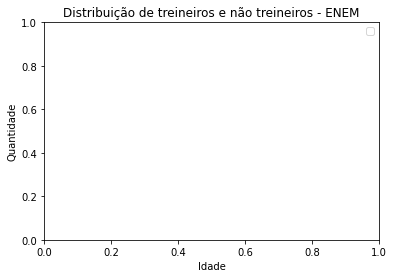

In [74]:
#Para adicionar título foi importado a biblioteca Matplotlib
#Exemplo:
plt.title("Distribuição de treineiros e não treineiros - ENEM")
plt.xlabel("Idade")
plt.ylabel("Quantidade")
plt.legend(['Treineiros','Não Treineiros'])

**Desafio04: Plotar os Histogramas das idades dos do treineiro e não treineiros.**

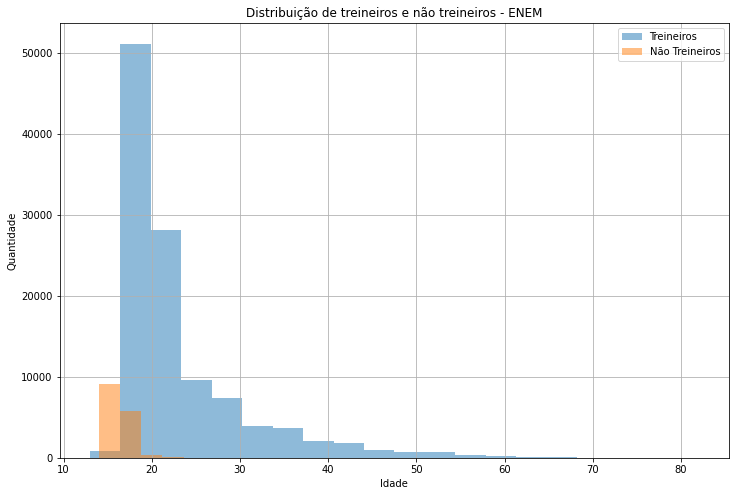

In [71]:
#Criando os dataframes
ntr = dados.query("IN_TREINEIRO == 0")["NU_IDADE"].hist(bins = 20, figsize = (12, 8), 
                                                        alpha = 0.5)
tr = dados.query("IN_TREINEIRO == 1")["NU_IDADE"].hist(bins = 20, figsize = (12, 8), 
                                                       alpha = 0.5)
#Adicionando legendas e títulos
plt.title("Distribuição de treineiros e não treineiros - ENEM")
plt.xlabel("Idade")
plt.ylabel("Quantidade")
plt.legend(['Treineiros','Não Treineiros'])

**Desafio05: Comparar as distribuições das provas em inglês espanhol.**

([<matplotlib.axis.XTick at 0x7f81dbe83748>,
 [Text(0, 0, 'Inglês'), Text(0, 0, 'Espanhol')])

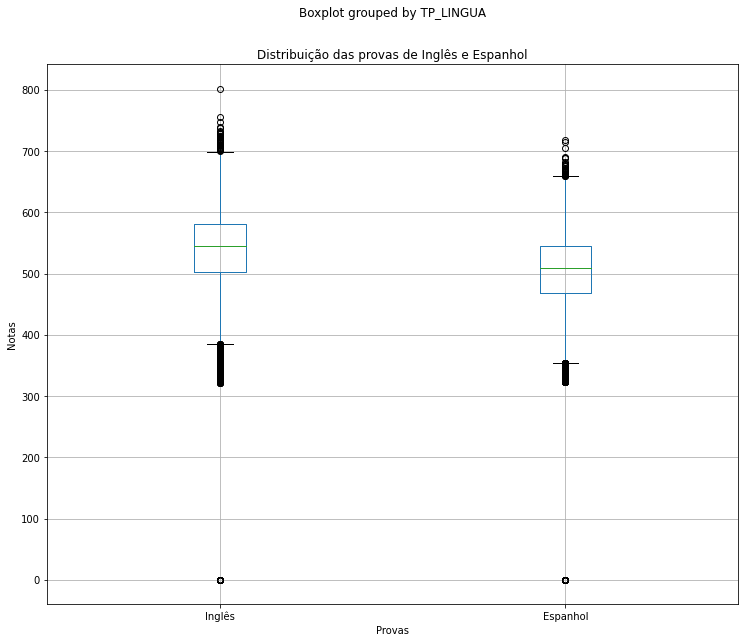

In [87]:
#No dicionário de dados as provas são classificadas por tipo "TP_LINGUA", onde '0' = Inglês e '1' = Espanhol
dados.boxplot(by ="TP_LINGUA", column = ["NU_NOTA_LC"], grid = True, figsize = (12, 10))

#Adicionando legendas e títulos
plt.title("Distribuição das provas de Inglês e Espanhol")
plt.xlabel("Provas")
plt.ylabel("Notas")
plt.xticks([1, 2], ['Inglês', 'Espanhol'])


**Desafio06: Explorar a documentações e visualizações com matplotlib ou pandas e gerar novas visualizações.**

Ralizei uma pesquisa rápida nas fontes abaixo:

*   [Entendo mais sobre pandas](https://pandas.pydata.org/)
*   [Explorando alguns modelos de plots com pandas](https://cmdlinetips.com/2020/01/tips-to-make-common-plots-with-pandas/)
*   [Entendo mais sobre o boxplot](https://cadernoscicomp.com.br/tutorial/matplot-e-pandas/matplot-e-pandas-em-estatistica-basica-boxplot-e-graficos-pizza-ou-setores/)
*   [Entendo mais sobre dataframe](https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.DataFrame.plot.bar.html)

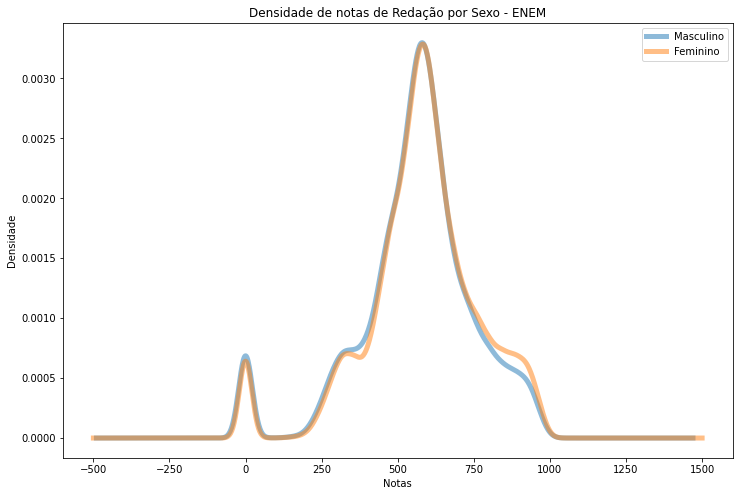

In [113]:
#Defini por criar um gráfico de densidade
#Criando os dataframes
ntr = dados.query("TP_SEXO == 'M'")["NU_NOTA_REDACAO"].plot.density(figsize = (12, 8), 
                                                        alpha = 0.5, linewidth=5)
tr = dados.query("TP_SEXO == 'F'")["NU_NOTA_REDACAO"].plot.density(figsize = (12, 8), 
                                                       alpha = 0.5,linewidth=5)
#Adicionando legendas e títulos
plt.title("Densidade de notas de Redação por Sexo - ENEM")
plt.xlabel("Notas")
plt.ylabel("Densidade")
plt.legend(['Masculino','Feminino'])